In [1]:
#IMPORT PACKAGE
import numpy as np
import matplotlib.pyplot as plt
import imageio
import colorsys
import sys
import scipy.ndimage as nd
from PIL import Image
import mgcreate
import edge
import color

In [3]:
#Color Converter
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

1. Create a binary valued image that contains a square annulus (use the function **SquareAnnulus** with the default values from the module *mgcreate* in the provided software). This image is $ a[\vec{x}] $ and apply the following subtraction to get a version of an edge-enhanced image,

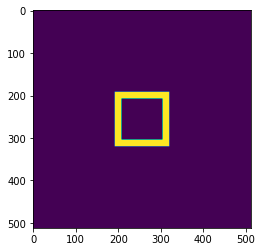

In [4]:
#Nomor 1

#Memuat Square Abylus
citra_1 = mgcreate.SquareAnnulus()
plt.imshow(citra_1)

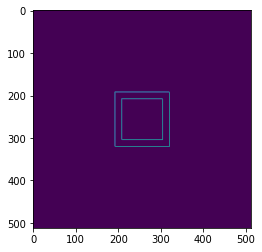

In [5]:
#Menerapkan Pengurangan Yang Diberikan
citra_1_d = nd.shift(citra_1,(1,1))
citra_1_bx = np.abs(citra_1 - citra_1_d)
plt.imshow(citra_1_bx)

2. Create a binary valued image that contains a square annulus (use the function **SquareAnnulus** with the default values from the module *mgcreate* in the provided software). This image is $ a[\vec{x}] $ and apply the following subtraction to get a version of an edge-enhanced image,

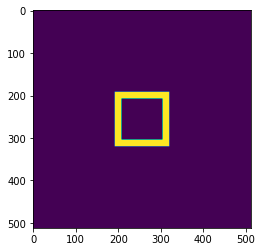

In [6]:
#Nomor 2


#Memuat Square Abylus
citra_2 = mgcreate.SquareAnnulus()
plt.imshow(citra_2)

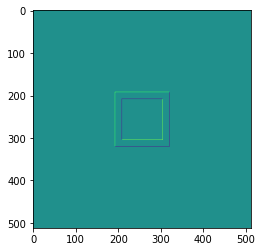

In [7]:
#Menerapkan Pengurangan Yang Diberikan
citra_2_d = nd.shift(citra_2,(1,1))
citra_2_bx = citra_2 - citra_2_d
plt.imshow(citra_2_bx)

3. Use $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$. Compute the following:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing \\
1 \\
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathcal{L}_{RGB}\begin{Bmatrix}
\mathrm{\mathbf{c}}[\vec{x}] \\
\mathrm{\mathbf{d}}[\vec{x}] \\
1
\end{Bmatrix}
$$

$$
\mathrm{\mathbf{g}}[\vec{x}] = 
\mathrm{\mathbf{\alpha}}\mathrm{\mathbf{f}}[\vec{x}] +
(1 - \mathrm{\mathbf{\alpha}})\mathrm{\mathbf{b}}[\vec{x}]/\bigwedge \mathrm{\mathbf{b}}[\vec{x}]
$$


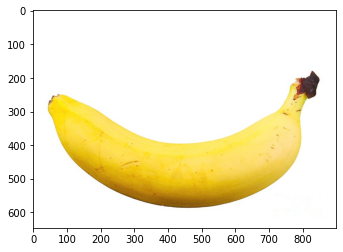

In [9]:
#Nomor 3


# Memuat Citra banana.jped
citra_3 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_3)

In [10]:
# Convert Citra ke HSV
citra_3_h, citra_3_s, citra_3_v = rgb_to_hsv(citra_3[...,0], citra_3[...,1], citra_3[...,2])


In [11]:
# Citra Yang Hanya Mengekstrak Channel v dan dilakukan edge Operator
citra_3_bx = edge.Sobel(citra_3_v)
# Citra Yang Hanya Mengekstrak Channel h
citra_3_cx = citra_3_h
# Citra Yang Hanya Mengekstrak Channel S
citra_3_dx = citra_3_s

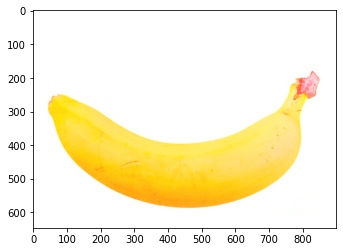

In [12]:
#Membuat Citra RGB dari HSV tetapi channel ke 3 
citra_3_r, citra_3_g, citra_3_b = hsv_to_rgb(citra_3_cx, citra_3_dx, np.full((citra_3.shape[0], citra_3.shape[1]), 1.0))
citra_3_fx = np.dstack((citra_3_r, citra_3_g, citra_3_b))
plt.imshow(citra_3_fx)

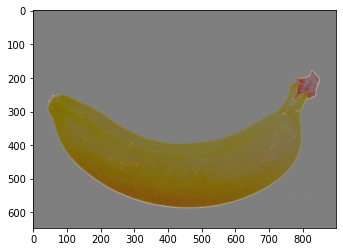

In [13]:
# Membuat Citra
alpha_3 = 0.5
citra_3_temp = ((1-alpha_3)*citra_3_bx)/citra_3_bx.max()
citra_3_gx = (alpha_3*citra_3_fx) + np.dstack((citra_3_temp,citra_3_temp,citra_3_temp))
plt.imshow(citra_3_gx)

4. Create a binary valued image that contains a square annulus (use the function **SquareAnnulus** with the default values from the module *mgcreate* in the provided software). This image is $ a[\vec{x}] $ and apply the following subtraction to get a version of an edge-enhanced image,

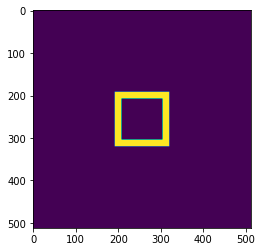

In [14]:
#Nomor 4


#Load Citra
citra_4 = mgcreate.SquareAnnulus()
plt.imshow(citra_4)

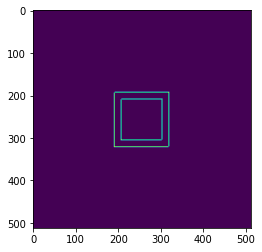

In [15]:
# Menerapkan Perintah yang Diberikan
citra_4_bx = np.abs(citra_4 - (nd.shift(citra_4,(2,-2))))
plt.imshow(citra_4_bx)

5. Write the operator notation that receives a gray image $ a[\vec{x}] $, and then smooth the edge-enhanced version of this image

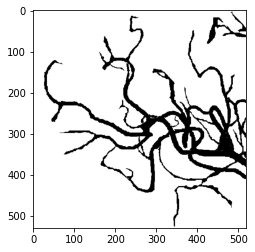

In [17]:
#Nomor 5



#Memuat Citra Abu-abu
citra_5 = imageio.imread('smother.png', as_gray=True)
plt.imshow(citra_5, cmap="gray")

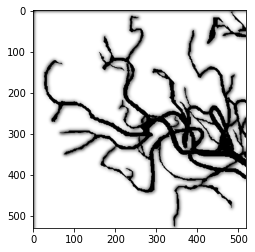

In [18]:
#Melakukan operasi mendapatkan edge
citra_5_d = abs(citra_5 - nd.shift(citra_5,(1,1),order=0))

#Melakukan smooth terhadap edge
citra_5_fil = nd.gaussian_filter(citra_5_d+0.0,4)
citra_5_mask = 1 - citra_5_fil/citra_5_fil.max()
#Mengalikan hasil smooth dengan citra awal
citra_5_output = citra_5*citra_5_mask
plt.imshow(citra_5_output, cmap="gray")

6. Use $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$, and apply the Sobel edge enhancement algorithm to compute the following:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing \\
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]


$$\mathrm{\mathbf{c}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]

$$\mathrm{\mathbf{d}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing\\
1
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathrm{\mathbf{b}}[\vec{x}] +
\mathrm{\mathbf{c}}[\vec{x}] +
\mathrm{\mathbf{d}}[\vec{x}]
$$

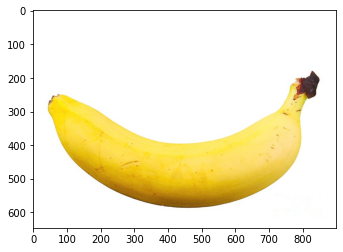

In [20]:
#Nomor 6




citra_6 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_6)

In [21]:
# Buat 3 Citra Baru Dengan Hasil Ekstrak Tiap Channel
# Citra Channel red
citra_6_r = citra_6[...,0]
# Citra Channel Green
citra_6_g = citra_6[...,1]
# Citra Channel Blue
citra_6_b = citra_6[...,2]

In [22]:
# Lakukan Edge Sobel Filter ke Tiap Citra 
citra_6_bx = edge.Sobel(citra_6_r)
citra_6_cx = edge.Sobel(citra_6_g)
citra_6_dx = edge.Sobel(citra_6_b)

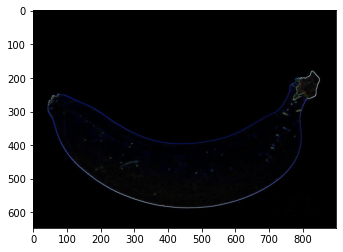

In [23]:
# Buat Citra Baru Dengan Menggabungkan tiap Channel
citra_6_fx = np.dstack((citra_6_bx, citra_6_cx, citra_6_dx))
# Normalize Citra
citra_6_fx = citra_6_fx/citra_6_fx.max()
plt.imshow(citra_6_fx)

7. Consider $\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\mathrm{\mathbf{a}}[\vec{x}]$, where $ m $ uses the **DerivEdge** function. The second argument to this function is $ (k,k) $, where $ k $ is the amount of shift equal in both dimensions. Which value of $ k $ produces the maximum pixel value in $ \mathrm{\mathbf{b}}[\vec{x}] $? Why?

In [24]:
#Nomor 7



# Load Citra
citra_7 = mgcreate.Checkerboard()
# Minimum DImensi
minDimension = min(np.array(citra_7.shape))
minDimension


512

In [25]:
#Nilai Piksel Maksimum Dari Citra
citra_7.sum()

131072.0

In [26]:
# Perbandingan Perubahan Nilai Piksel
# Ketika k = 1
print('k=1 : ',edge.DerivEdge(citra_7,(1,1)).sum())
#Ketika k = 511
print('\nk=511 : ', edge.DerivEdge(citra_7,(511,511)).sum())
# Ketika k = 512
print('\nk=512 : ',edge.DerivEdge(citra_7,(512,512)).sum())
#Ketika k = -600
print('\nk=-600 : ', edge.DerivEdge(citra_7,(-600,-600)).sum())


k=1 :  15391.0

k=511 :  131071.0

k=512 :  131072.0

k=-600 :  131072.0


8. Use the **Checkerboard** function in the provided *mgcreate* module to create a checkerboard pattern $\mathrm{\mathbf{a}}[\vec{x}]$.  Using  the **DerivEdge** function,  compute  the  edge-enhanced  image $\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\mathrm{\mathbf{a}}[\vec{x}]$ with a shift of $(1,1)$. Repeat the same experiment with a shift of $(32,32)$. Explain why the outputs are different.

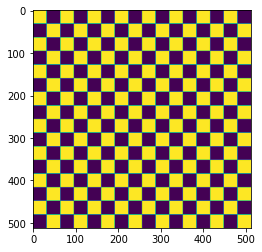

In [27]:
#Nomor 8


citra_8 = mgcreate.Checkerboard()
plt.imshow(citra_8)

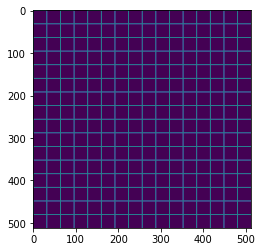

In [28]:
citra_8_bx = edge.DerivEdge(citra_8, (1,1))
plt.imshow(citra_8_bx)

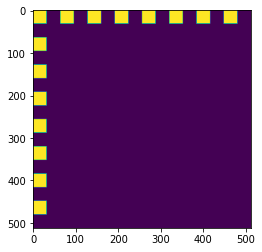

In [29]:
citra_8_bx = edge.DerivEdge(citra_8, (32,32))
plt.imshow(citra_8_bx)

Method `DerivEdge()` mengembalikan citra dari hasil pengurangan antara citra awal dengan citra yang telah di shift sebanyak (k, k).

Pada soal ini, method `CheckerBoard()` mengembalikan citra papan dam dengan ukuran papan 16x16 dan ukuran tiap kotak sebesar 32 px. 

Output dari kedua proses ini berbeda karena pada proses pertama dilakukan deriveedge dengan pergeseran $(1,1)$ artinya citranya bergerak 1 piksel pada sumbu x, dan, 1 piksel pula pada sumbu y, sehingga selisih dengan citra awal tidak terlalu jauh yang menyebabkan outputnya dapat menunjukkan tepi dengan jelas. Sedangkan proses kedua dilakukan deriveedge dengan pergeseran $(32,32)$ bergerak 32 piksel pada sumbu x, dan 32 piksel pada sumbu y yang mana peregeseran ini lebih besar dari ukuran kotak itu sendiri maka selisih dari citra tidak akan menunjukkan tepi citra lagi, tapi malah menghilangkan sebagian piksel dari citra. 



9. Given an input image $\mathrm{\mathbf{a}}[\vec{x}]$ from the **Homeplate** function in the *mgcreate* module. Compute $\mathrm{\mathbf{b}}[\vec{x}]$ as $$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\mathrm{\mathbf{a}}[\vec{x}]$$ where $m$ is the Sobel edge enhancement algorithm. Create $\mathrm{\mathbf{c}}[\vec{x}]$ as,$$\mathrm{\mathbf{c}}[\vec{x}] = 
\Gamma_{5.5}\mathrm{\mathbf{b}}[\vec{x}]$$


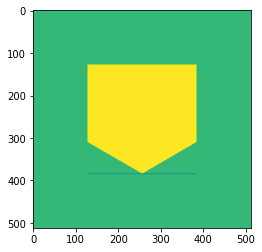

In [30]:
#Nomor 9



#Memuat Citra
citra_9 = mgcreate.Homeplate().astype('float64')
plt.imshow(citra_9)

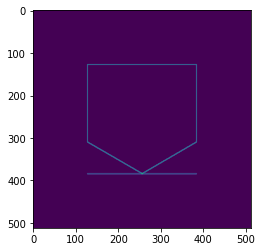

In [31]:
#Lakukan sobel filter terhadap citra
citra_9_bx = edge.Sobel(citra_9)
plt.imshow(citra_9_bx)

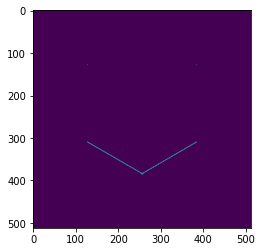

In [32]:
# Lakukan thresshold dengan hanya mengambil value yang > 5.5
citra_9_cx = (citra_9_bx > 5.5)
plt.imshow(citra_9_cx)

10. Use $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.

*   Item daftar
*   Item daftar

jpeg'}\right)$. Compute the following:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing \\
\end{Bmatrix}
\mathcal{L}_{YUV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{YUV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing\\
1
\end{Bmatrix}
\mathcal{L}_{YUV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathrm{\mathbf{b}}[\vec{x}] +
\mathrm{\mathbf{c}}[\vec{x}] +
\mathrm{\mathbf{d}}[\vec{x}]
$$

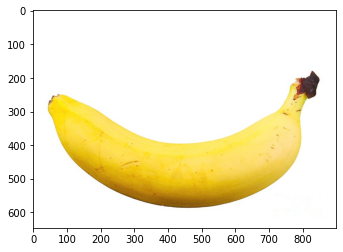

In [33]:
#Nomor 10


# Memuat Citra
citra_10 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_10)

In [34]:
#Merubah warna Citra Ke YUV
citra_10_r, citra_10_g, citra_10_b = citra_10[...,0], citra_10[...,1], citra_10[...,2]
citra_10_y, citra_10_u, citra_10_v = color.RGB2YUV(citra_10_r, citra_10_g, citra_10_b)

In [35]:
#Lakukan Sobel Filter ke Semua Citra
citra_10_bx = edge.Sobel(citra_10_y)
citra_10_cx = edge.Sobel(citra_10_u)
citra_10_dx = edge.Sobel(citra_10_v)

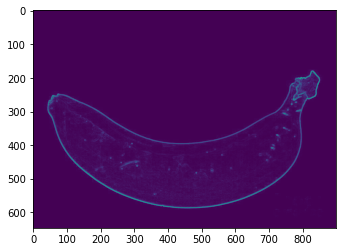

In [36]:
#Buat Citra baru yang menjumlahkan citra sebelumnya
citra_10_fx = citra_10_bx + citra_10_cx + citra_10_dx
#Normalize
citra_10_fx /= citra_10_fx.max()
plt.imshow(citra_10_fx)

11. Use $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$. Compute the following:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing \\
1 \\
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$


$$\mathrm{\mathbf{d}}[\vec{x}] = 
\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$


$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathcal{L}_{RGB}\begin{Bmatrix}
\mathrm{\mathbf{c}}[\vec{x}] \\
\mathrm{\mathbf{d}}[\vec{x}] \\
\varnothing
\end{Bmatrix}
$$


$$
\mathrm{\mathbf{g}}[\vec{x}] = 
\mathrm{\mathbf{\alpha}}\mathrm{\mathbf{f}}[\vec{x}] +
(1 - \mathrm{\mathbf{\alpha}})\mathrm{\mathbf{b}}[\vec{x}]
$$


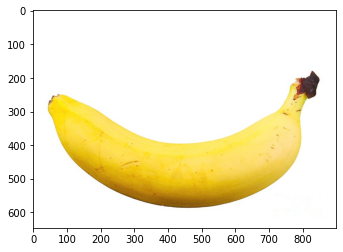

In [37]:
#Nomor 11



#Load Citra
citra_11 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_11)

In [38]:
#Ubah Citra ke HSV
citra_11_h, citra_11_s, citra_11_v = rgb_to_hsv(citra_11[...,0], citra_11[...,1], citra_11[...,2])

In [39]:
#Lakukan Filter Sobel Ke Citra Channel v
citra_11_bx = edge.Sobel(citra_11_v)
#
citra_11_cx, citra_11_dx = citra_11_h, citra_11_s

In [40]:
#Ubah Kembali Citra Ke RGB tapi mengisi channel b dengan himpunan kosong
citra_11_r, citra_11_g, citra_11_b = hsv_to_rgb(citra_11_cx, citra_11_dx, np.zeros((citra_11.shape[0], citra_11.shape[1])))

In [41]:
#Buat Citra Dari channel rgb baru
citra_11_fx = np.dstack((citra_11_r, citra_11_g, citra_11_b))

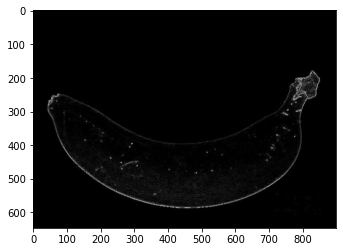

In [42]:
# Lakukan operasi gx untuk mendapatkan citra hasil
alpha_11 = 0.5
citra_11_temp = ((1-alpha_11)*citra_11_bx)
citra_11_gx = (alpha_11* citra_11_fx) + np.dstack( ( citra_11_temp, citra_11_temp, citra_11_temp ) )

plt.imshow((citra_11_gx* 255).astype(np.uint8))

12. Use $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$, and apply the Sobel edge enhancement algorithm to compute the following:

$$ 
\mathrm{\mathbf{b}}[\vec{x}] = 
\mathrm{\mathbf{a}}[\vec{x}]-
E_{m}\mathcal{L}_{L}
\mathrm{\mathbf{a}}[\vec{x}]
$$

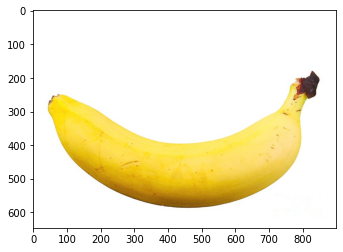

In [43]:
#Nomor 12


#Memuat Citra
citra_12 = imageio.imread('banana.jpg').astype('float64')/255
plt.imshow(citra_12)

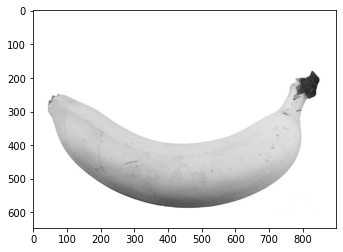

In [44]:
#Merubah Citra Jadi Abu-Abu
citra_12_gray = 0.5 *citra_12[:,:,0] + 0.75*citra_12[:,:,1] + 0.25*citra_12[:,:,2]
plt.imshow(citra_12_gray, cmap="gray")

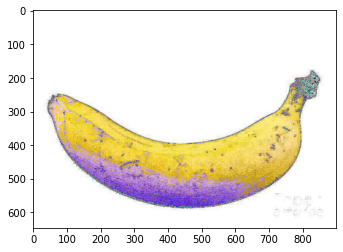

In [45]:
# Melakukan filter dengan fungsi sobel 
citra_12_temp = edge.Sobel(citra_12_gray)
citra_12_bx = citra_12 -(np.dstack((citra_12_temp, citra_12_temp, citra_12_temp)))

plt.imshow((citra_12_bx * 255).astype(np.uint8))